In [1]:
import numpy as np

class PCA:
    
    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X):
        self.X_mean = X - np.mean(X, axis=0)
        cov = np.cov(self.X_mean, rowvar=False)
        eigen_values, eigen_vectors = np.linalg.eig(cov)
        index = np.argsort(eigen_values)[::-1]
        sorted_vector = eigen_vectors[:, index]
        X_transform = sorted_vector[:, 0:self.n_components]
        X_transform[:, 1] *= -1
        return X_transform
    
    def transform(self, X):
        return np.dot(self.X_mean, self.fit(X))

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
x = data.iloc[:,0:4]

#prepare the target
target = data.iloc[:,4]
 
pca = PCA(n_components=2)
pca.fit(x)
df = pca.transform(x)

principal_df = pd.DataFrame(df , columns = ['PC1','PC2'])
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

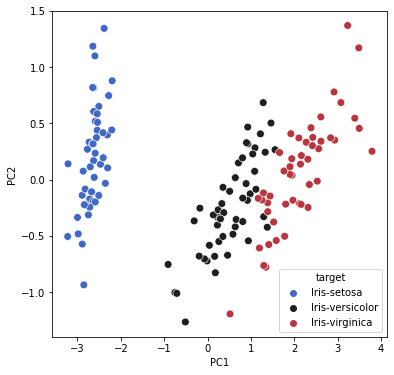

In [3]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1', y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire');